# 机器学习二

# Lecture 04

1. Data 
+ Pre-processing 
+ Feature-Extractor
+ Split Training, Test, Validation
+ Build Model
+ Gradient Descent 
+ Evaluation
+ Predicat
+ Analysis

## House Price Regression

In [5]:
# loading Data
from sklearn.datasets import load_boston

## Usully will load in csv

In [7]:
data = load_boston()

In [8]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.DataFrame(data['data'])

In [11]:
df.columns = data['feature_names']

In [12]:
df[df['CHAS'] == 1]

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
142  3.32105   0.0  19.58   1.0  0.8710  5.403  100.0  1.3216   5.0  403.0   
152  1.12658   0.0  19.58   1.0  0.8710  5.012   88.0  1.6102   5.0  403.0   
154  1.41385   0.0  19.58   1.0  0.8710  6.129   96.0  1.7494   5.0  403.0   
155  3.53501   0.0  19.58   1.0  0.8710  6.152   82.6  1.7455   5.0  403.0   
160  1.27346   0.0  19.58   1.0  0.6050  6.250   92.6  1.7984   5.0  403.0   
162  1.83377   0.0  19.58   1.0  0.6050  7.802   98.2  2.0407   5.0  403.0   
163  1.51902   0.0  19.58   1.0  0.6050  8.375   93.9  2.1620   5.0  403.0   
208  0.13587   0.0  10.59   1.0  0.4890  6.064   59.1  4.2392   4.0  277.0   
209  0.43571   0.0  10.59   1.0  0.4890  5.344  100.0  3.8750   4.0  277.0   
210  0.17446   0.0  10.59   1.0  0.4890  5.960   92.1  3.8771   4.0  277.0   
211  0.37578   0.0  10.59   1.0  0.4890  5.404   88.6  3.6650   4.0  277.0   
212  0.21719   0.0  10.59   1.0  0.4890  5.807   53.8  3.6526   4.0  277.0   
216  0.04560   0.0  13.89   1.0  0.5500  5.888   56.0  3.1121   5.0  276.0   
218  0.11069   0.0  13.89   1.0  0.5500  5.951   93.8  2.8893   5.0  276.0   
219  0.11425   0.0  13.89   1.0  0.5500  6.373   92.4  3.3633   5.0  276.0   
220  0.35809   0.0   6.20   1.0  0.5070  6.951   88.5  2.8617   8.0  307.0   
221  0.40771   0.0   6.20   1.0  0.5070  6.164   91.3  3.0480   8.0  307.0   
222  0.62356   0.0   6.20   1.0  0.5070  6.879   77.7  3.2721   8.0  307.0   
234  0.44791   0.0   6.20   1.0  0.5070  6.726   66.5  3.6519   8.0  307.0   
236  0.52058   0.0   6.20   1.0  0.5070  6.631   76.5  4.1480   8.0  307.0   
269  0.09065  20.0   6.96   1.0  0.4640  5.920   61.5  3.9175   3.0  223.0   
273  0.22188  20.0   6.96   1.0  0.4640  7.691   51.8  4.3665   3.0  223.0   
274  0.05644  40.0   6.41   1.0  0.4470  6.758   32.9  4.0776   4.0  254.0   
276  0.10469  40.0   6.41   1.0  0.4470  7.267   49.0  4.7872   4.0  254.0   
277  0.06127  40.0   6.41   1.0  0.4470  6.826   27.6  4.8628   4.0  254.0   
282  0.06129  20.0   3.33   1.0  0.4429  7.645   49.7  5.2119   5.0  216.0   
283  0.01501  90.0   1.21   1.0  0.4010  7.923   24.8  5.8850   1.0  198.0   
356  8.98296   0.0  18.10   1.0  0.7700  6.212   97.4  2.1222  24.0  666.0   
357  3.84970   0.0  18.10   1.0  0.7700  6.395   91.0  2.5052  24.0  666.0   
358  5.20177   0.0  18.10   1.0  0.7700  6.127   83.4  2.7227  24.0  666.0   
363  4.22239   0.0  18.10   1.0  0.7700  5.803   89.0  1.9047  24.0  666.0   
364  3.47428   0.0  18.10   1.0  0.7180  8.780   82.9  1.9047  24.0  666.0   
369  5.66998   0.0  18.10   1.0  0.6310  6.683   96.8  1.3567  24.0  666.0   
370  6.53876   0.0  18.10   1.0  0.6310  7.016   97.5  1.2024  24.0  666.0   
372  8.26725   0.0  18.10   1.0  0.6680  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  
142     14.7  396.90  26.82  
152     14.7  343.28  12.12  
154     14.7  321.02  15.12  
155     14.7   88.01  15.02  
160     14.7  338.92   5.50  
162     14.7  389.61   1.92  
163     14.7  388.45   3.32  
208     18.6  381.32  14.66  
209     18.6  396.90  23.09  
210     18.6  393.25  17.27  
211     18.6  395.24  23.98  
212     18.6  390.94  16.03  
216     16.4  392.80  13.51  
218     16.4  396.90  17.92  
219     16.4  393.74  10.50  
220     17.4  391.70   9.71  
221     17.4  395.24  21.46  
222     17.4  390.39   9.93  
234     17.4  360.20   8.05  
236     17.4  388.45   9.54  
269     18.6  391.34  13.65  
273     18.6  390.77   6.58  
274     17.6  396.90   3.53  
276     17.6  389.25   6.05  
277     17.6  393.45   4.16  
282     14.9  377.07   3.01  
283     13.6  395.52   3.16  
356     20.2  377.73  17.60  
357     20.2  391.34  13.27  
358     20.2  395.43  11.48  
363     20.2  353.04  14.64  
364     20.2  354.55   5.29  
369     20.2  375.33   3.73  
370     20.2  392.05   2.96  
372     20.2  347.88   8.88

## Pre-processing

In [15]:
df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [16]:
df['CHAS'] = df['CHAS'].astype('int')
df['CHAS'] = df['CHAS'].astype('category')

In [17]:
df['RAD'] = df['RAD'].astype('int')
df['RAD'] = df['RAD'].astype('category')

In [19]:
df

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [20]:
df['RAD']

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: RAD, Length: 506, dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 24]

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
onehoter = OneHotEncoder()
chas_and_rad_vec = onehoter.fit_transform(df[['CHAS', 'RAD']])

## Standarlize

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss = StandardScaler()

In [34]:
df.shape

(506, 13)

In [35]:
real_vec = ss.fit_transform(df.drop(columns = ['CHAS', 'RAD']))

In [36]:
chas_and_rad_vec[0].toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [37]:
import numpy as np

In [39]:
np.mean(real_vec, axis = 0)

array([-1.12338772e-16,  7.89881994e-17,  2.10635198e-16, -1.96592852e-16,
       -1.08828186e-16, -1.47444639e-16, -8.42540793e-17,  0.00000000e+00,
       -4.21270397e-16, -7.44244367e-16, -3.08931624e-16])

In [40]:
np.std(real_vec, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
real_vec.shape

(506, 11)

In [42]:
chas_and_rad_vec.shape

(506, 11)

## Feature-Extractor

In [43]:
X = np.concatenate((real_vec, chas_and_rad_vec.toarray()), axis = 1)

In [44]:
y = data['target']

## Split Training, Test, Validation

In [46]:
def split_train_val_test(X, y, test_ratio = 0.2, val_ratio = 0.2):
    indices = np.random.choice(range(len(X)), size = len(X), replace=False)
    train_indices = indices[:int(len(X) * (1-test_ratio) * (1 - val_ratio))]
    val_indices = indices[int(len(X)*(1-test_ratio) * (1-val_ratio)): int(len(X) * (1-test_ratio))]
    test_indices = indices[int(len(X) * (1-test_ratio)):]

    return (X[train_indices], y[train_indices]), (X[val_indices], y[val_indices]), (X[test_indices], y[test_indices])


In [47]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_train_val_test(X, y)

sklearn.model_selection.train_test_split also could be used

### Build-Model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regression = LinearRegression()

In [51]:
regression.fit(X_train, y_train)

LinearRegression()

## Question: If overfittiing or underfitting? 
### Explain: Why validation set is more useful in deep learning
### Gradient Descent
### Evaluation


In [53]:
regression.score(X_train, y_train)

0.7477980609064946

In [54]:
regression.score(X_val, y_val)

0.7611715890963341

In [55]:
regression.score(X_test, y_test)

0.711869928554872

In [56]:
## Interpreter

In [58]:
regression.coef_

array([-1.04208922,  1.30263494,  0.29143618, -2.31827512,  2.40383155,
        0.25013857, -3.55953868, -1.68823412, -2.37743843,  0.74411049,
       -3.79489254, -0.79143926,  0.79143926, -2.51995654, -2.20671004,
        0.65594998, -0.31683083, -0.07929752, -2.15244627, -0.06686364,
        1.93167854,  4.75447632])

In [59]:
regression.intercept_

22.070279554739386

In [60]:
### Predict

In [61]:
X_test[0]

array([ 1.68404594, -0.48772236,  1.01599907,  1.07378711,  0.21279502,
        1.11749449, -0.93188642,  1.53092646,  0.80657583, -3.61192313,
        2.29842066,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

In [62]:
regression.predict([X_test[0]])

array([9.64589284])

In [63]:
import matplotlib.pyplot as plt

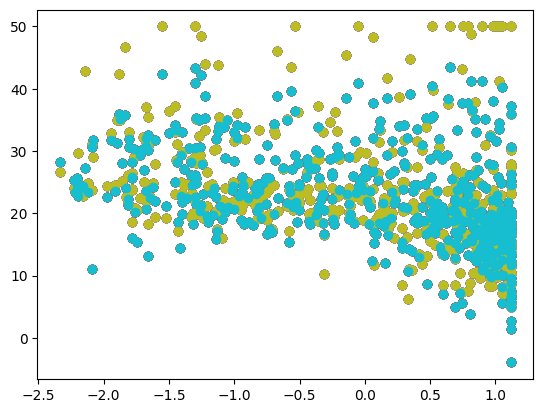

In [65]:
for i in range(5):
    plt.scatter(X[:, 5], y)
    plt.scatter(X[:, 5], regression.predict(X))

plt.show()

In [66]:
import matplotlib

In [67]:
matplotlib.colors

<module 'matplotlib.colors' from '/Users/lilithgames/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/colors.py'>

In [68]:
%matplotlib inline

In [73]:
def show_predication_result(x, target):
    width = 3

    fig,ax = plt.subplots(x.shape[1]//width + 1, width, figsize = (40,40))

    for i in range(x.shape[1]):
        ix = np.unravel_index(i, ax.shape)
        plt.sca(ax[ix])
        ax[ix].title.set_text('Feature-{}'.format(i))
        plt.scatter(x[:, i], target)
        plt.scatter(x[:, i], regression.predict(x))

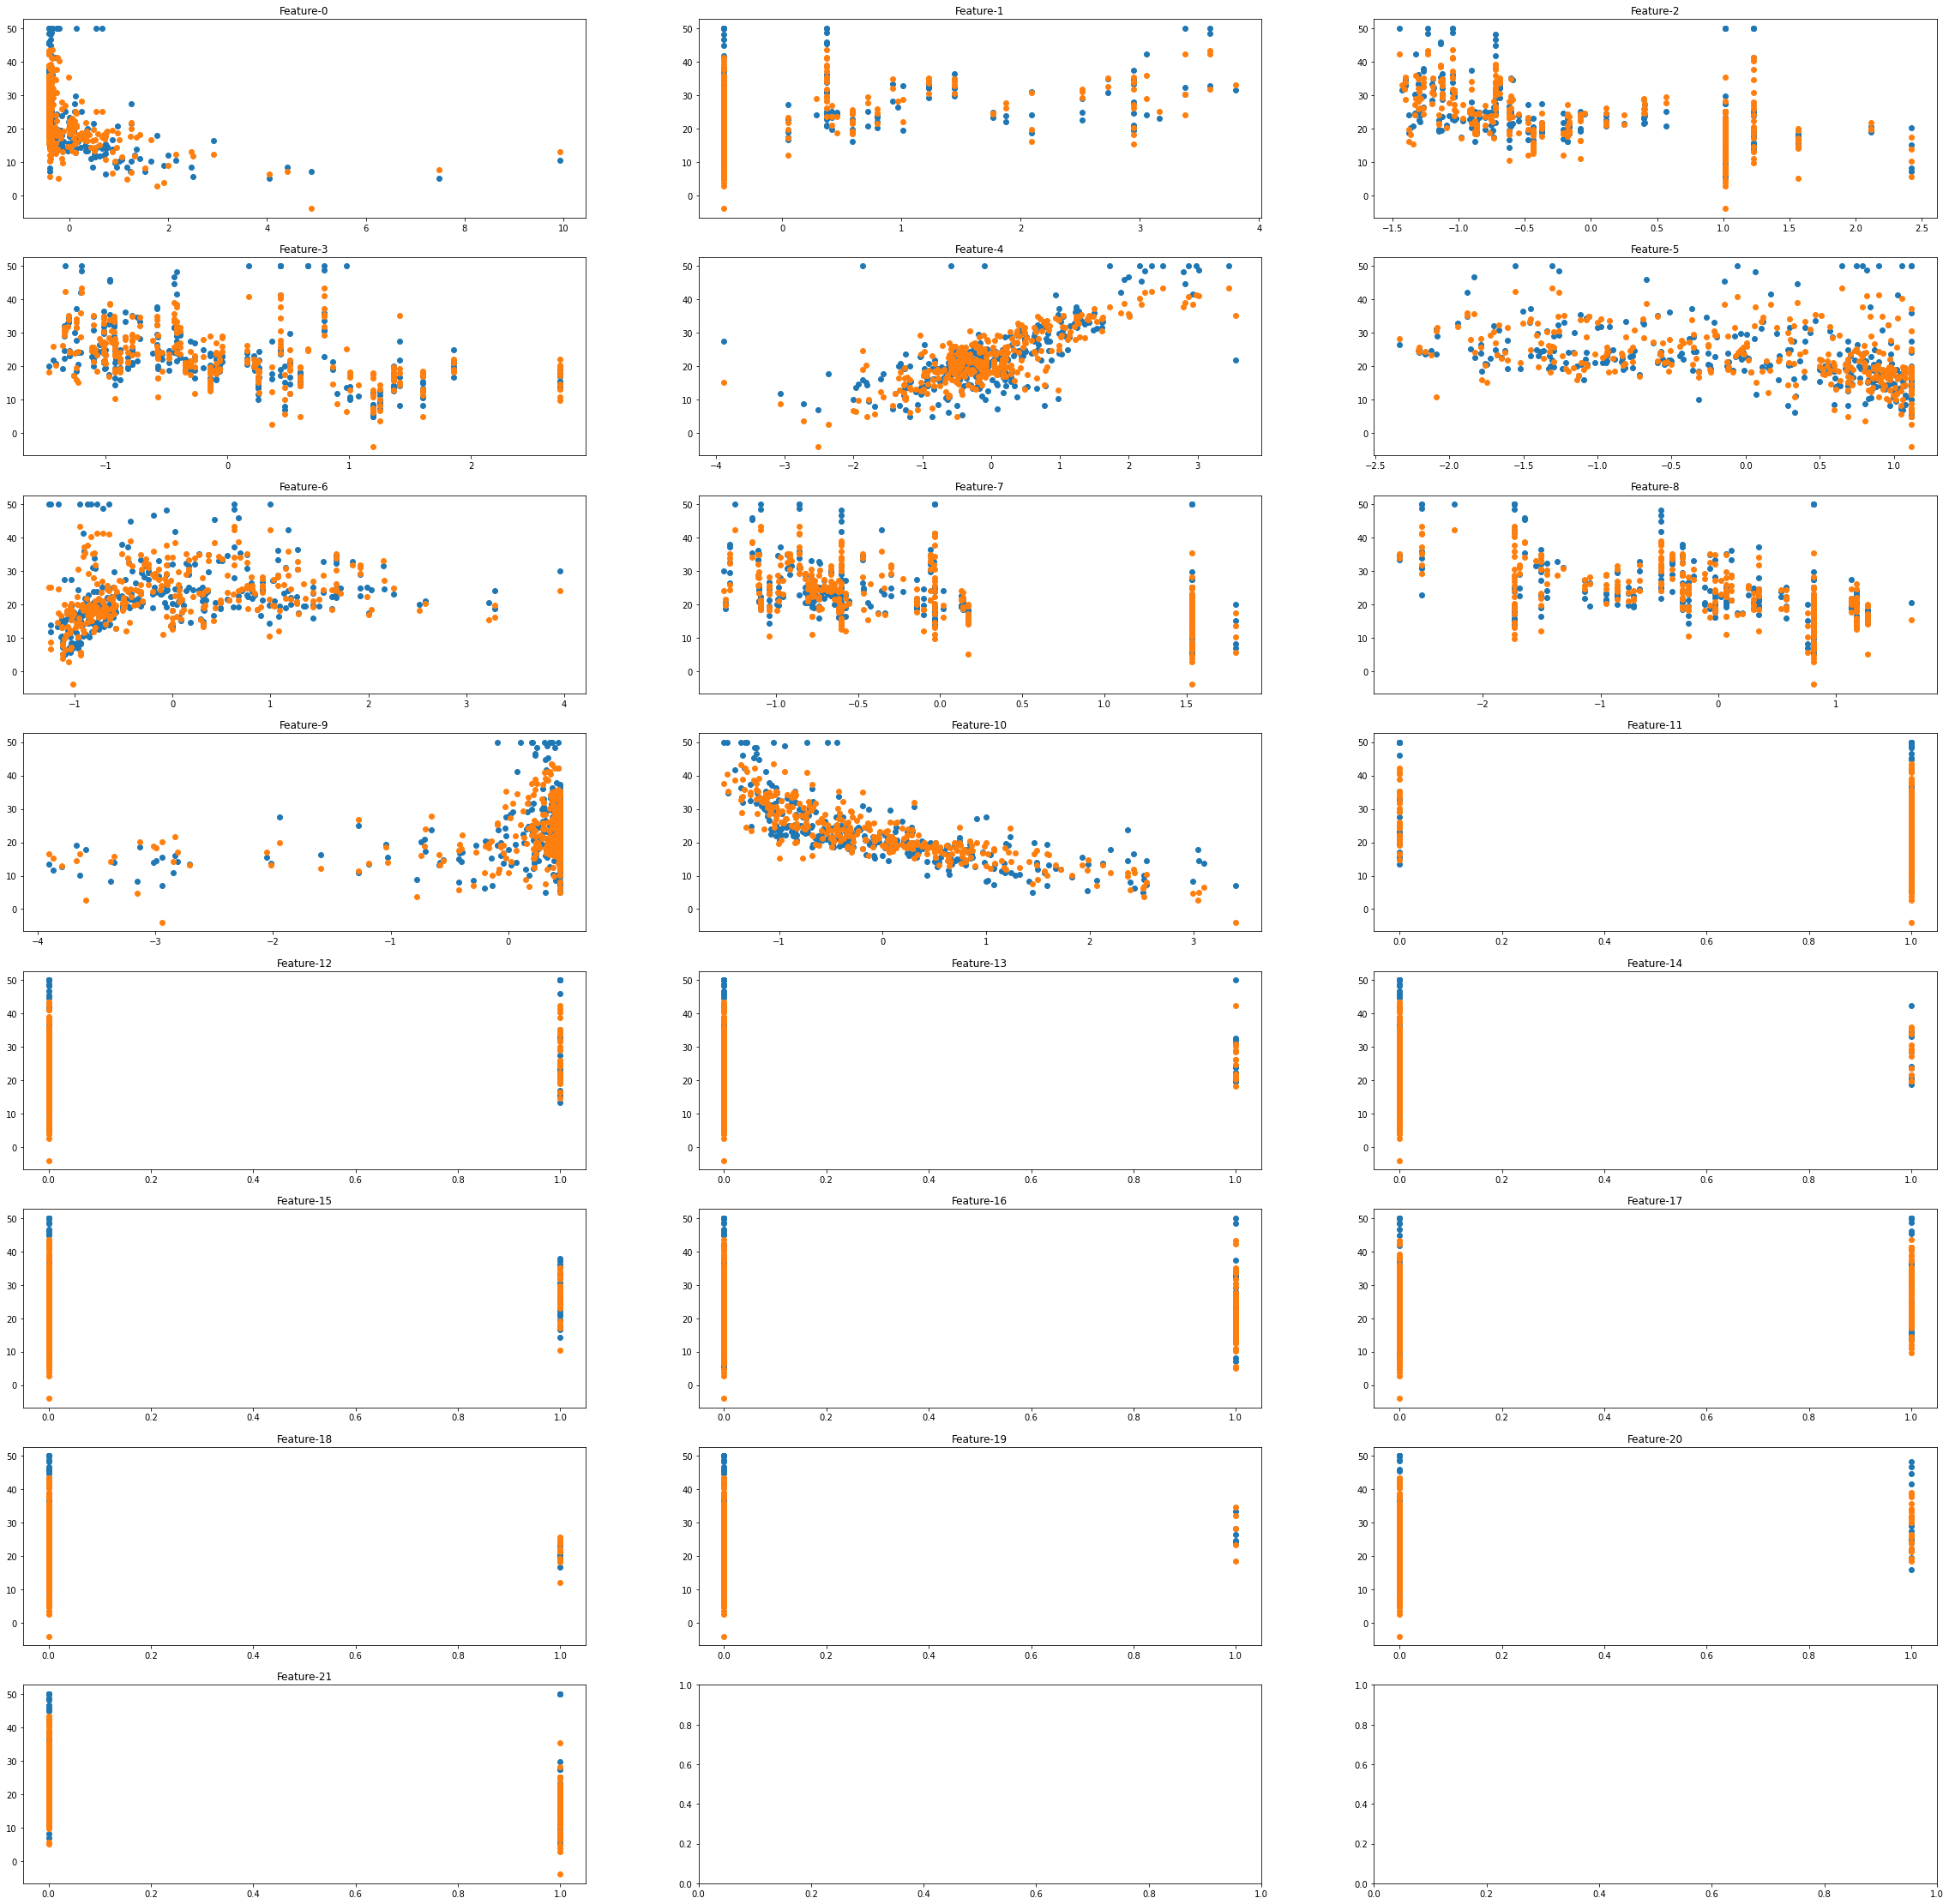

In [74]:
show_predication_result(X_train, y_train)

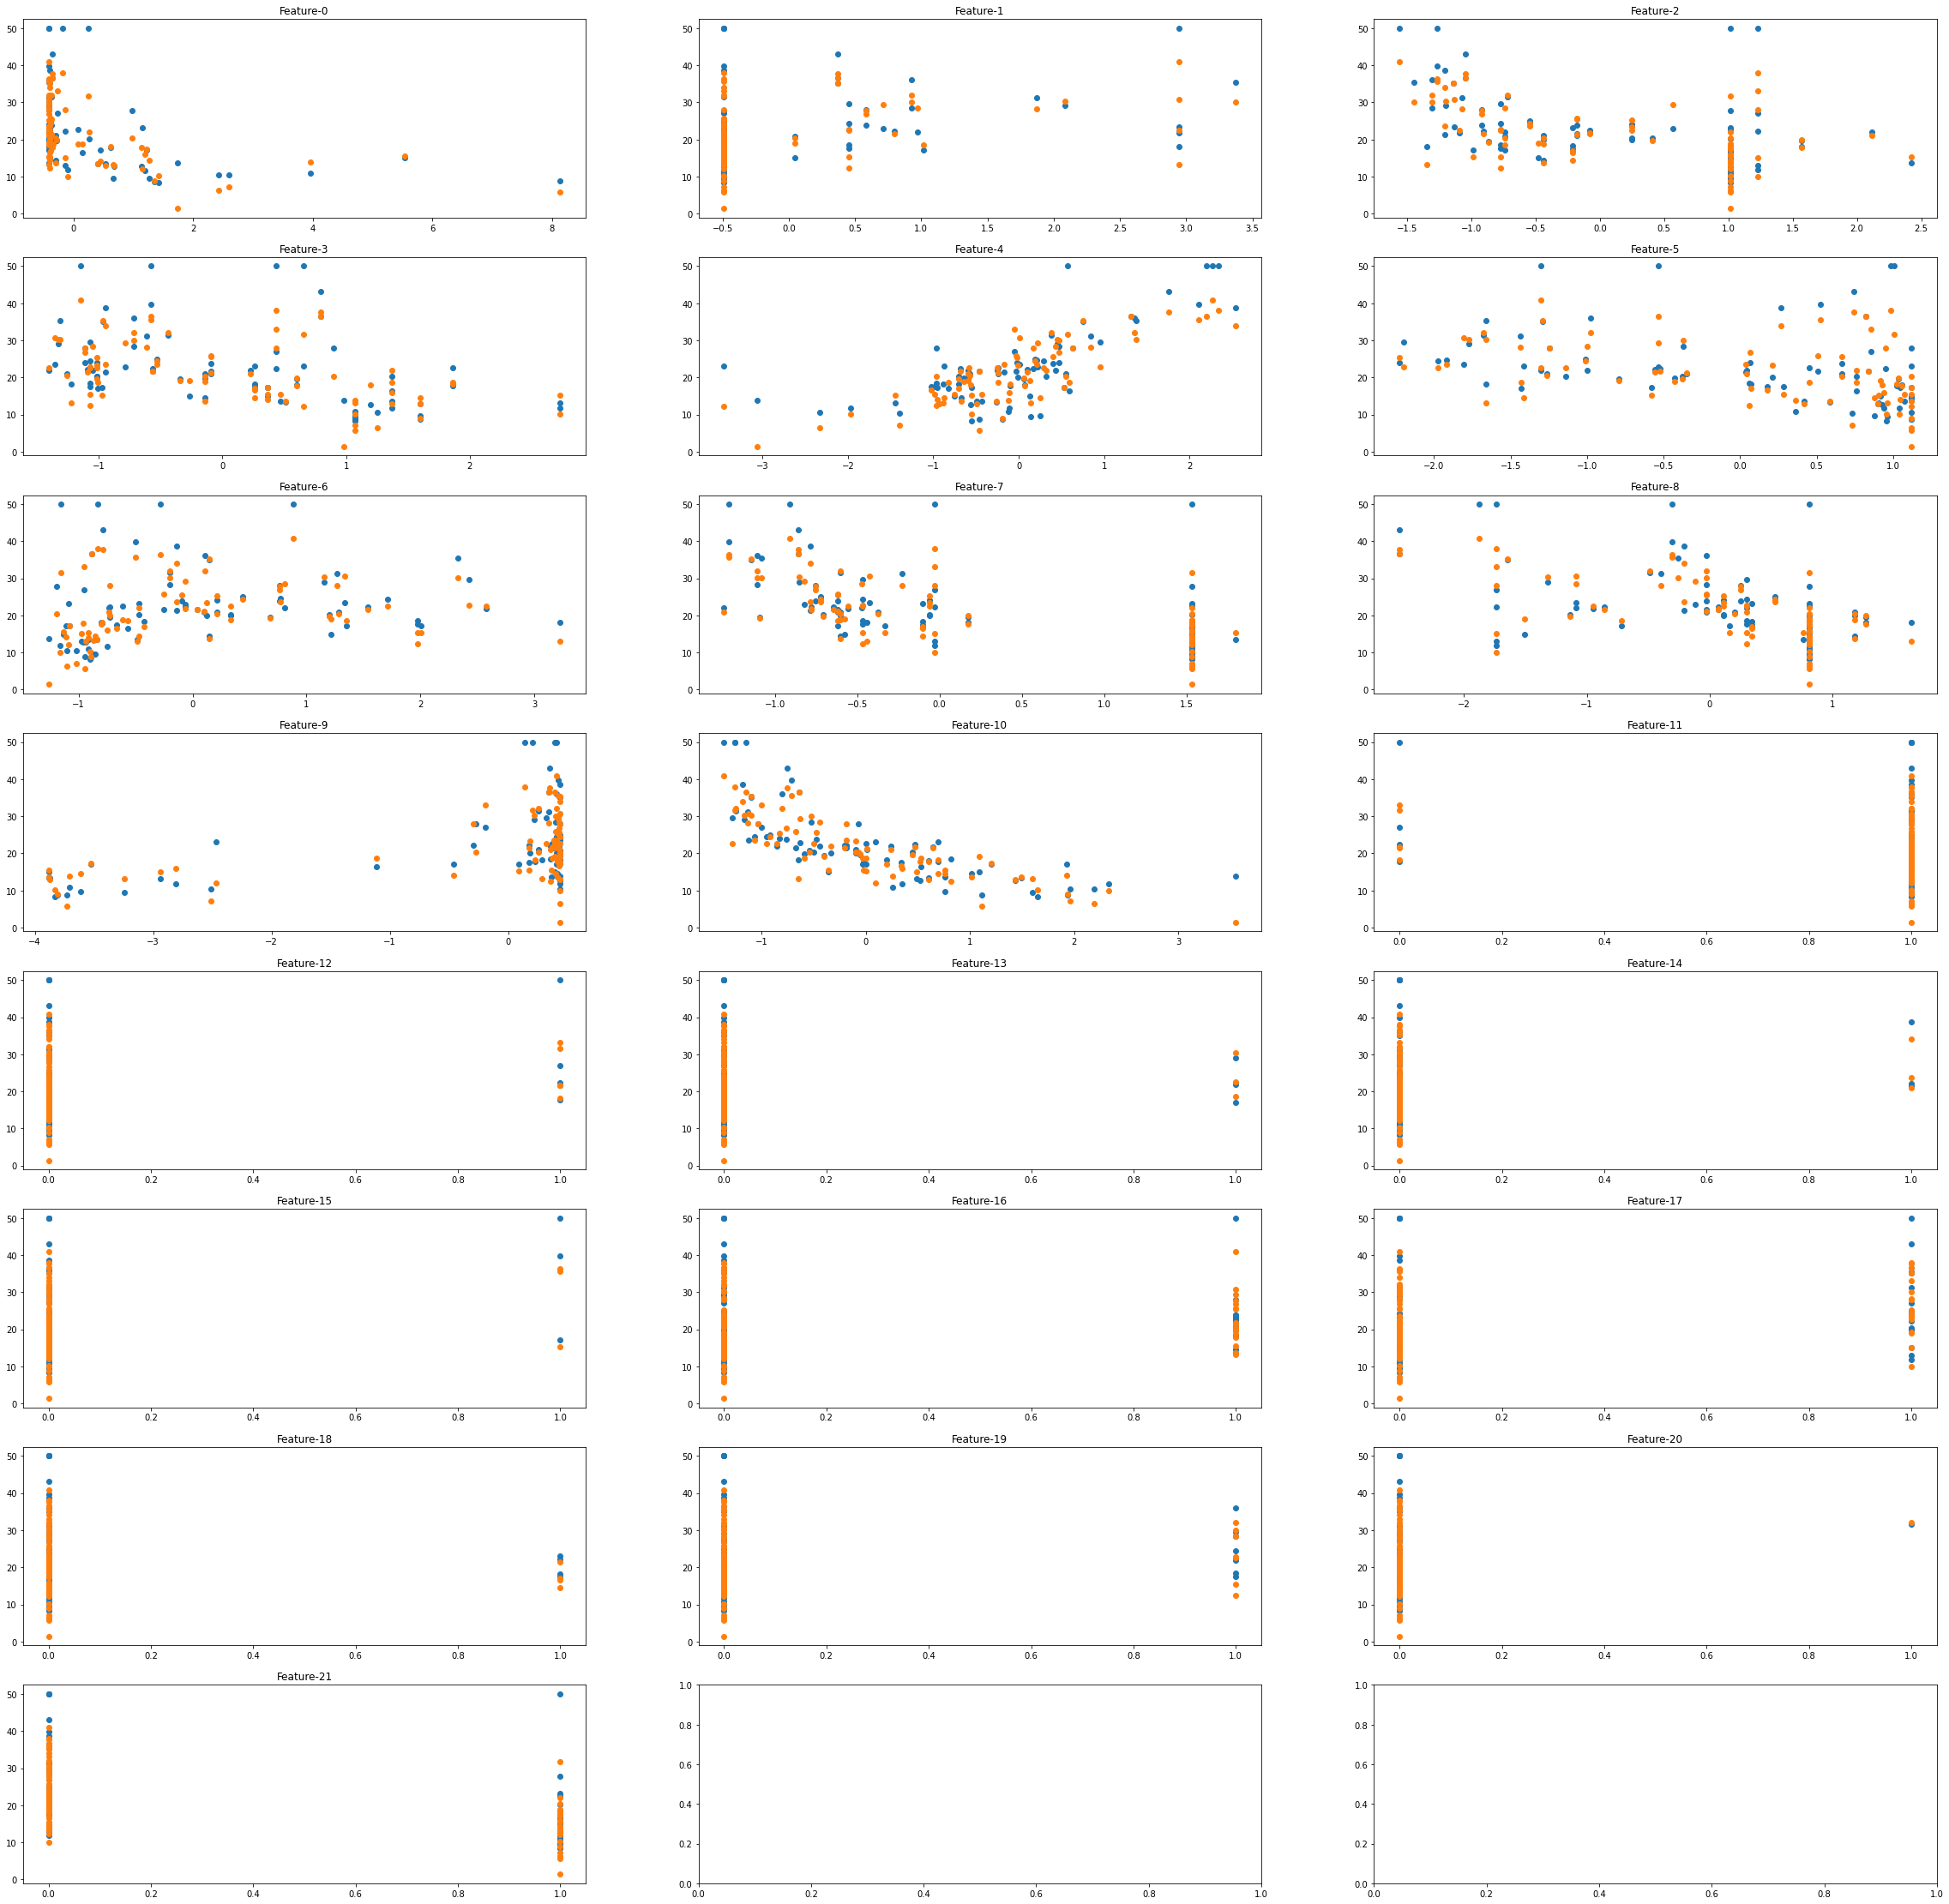

In [75]:
show_predication_result(X_val, y_val)

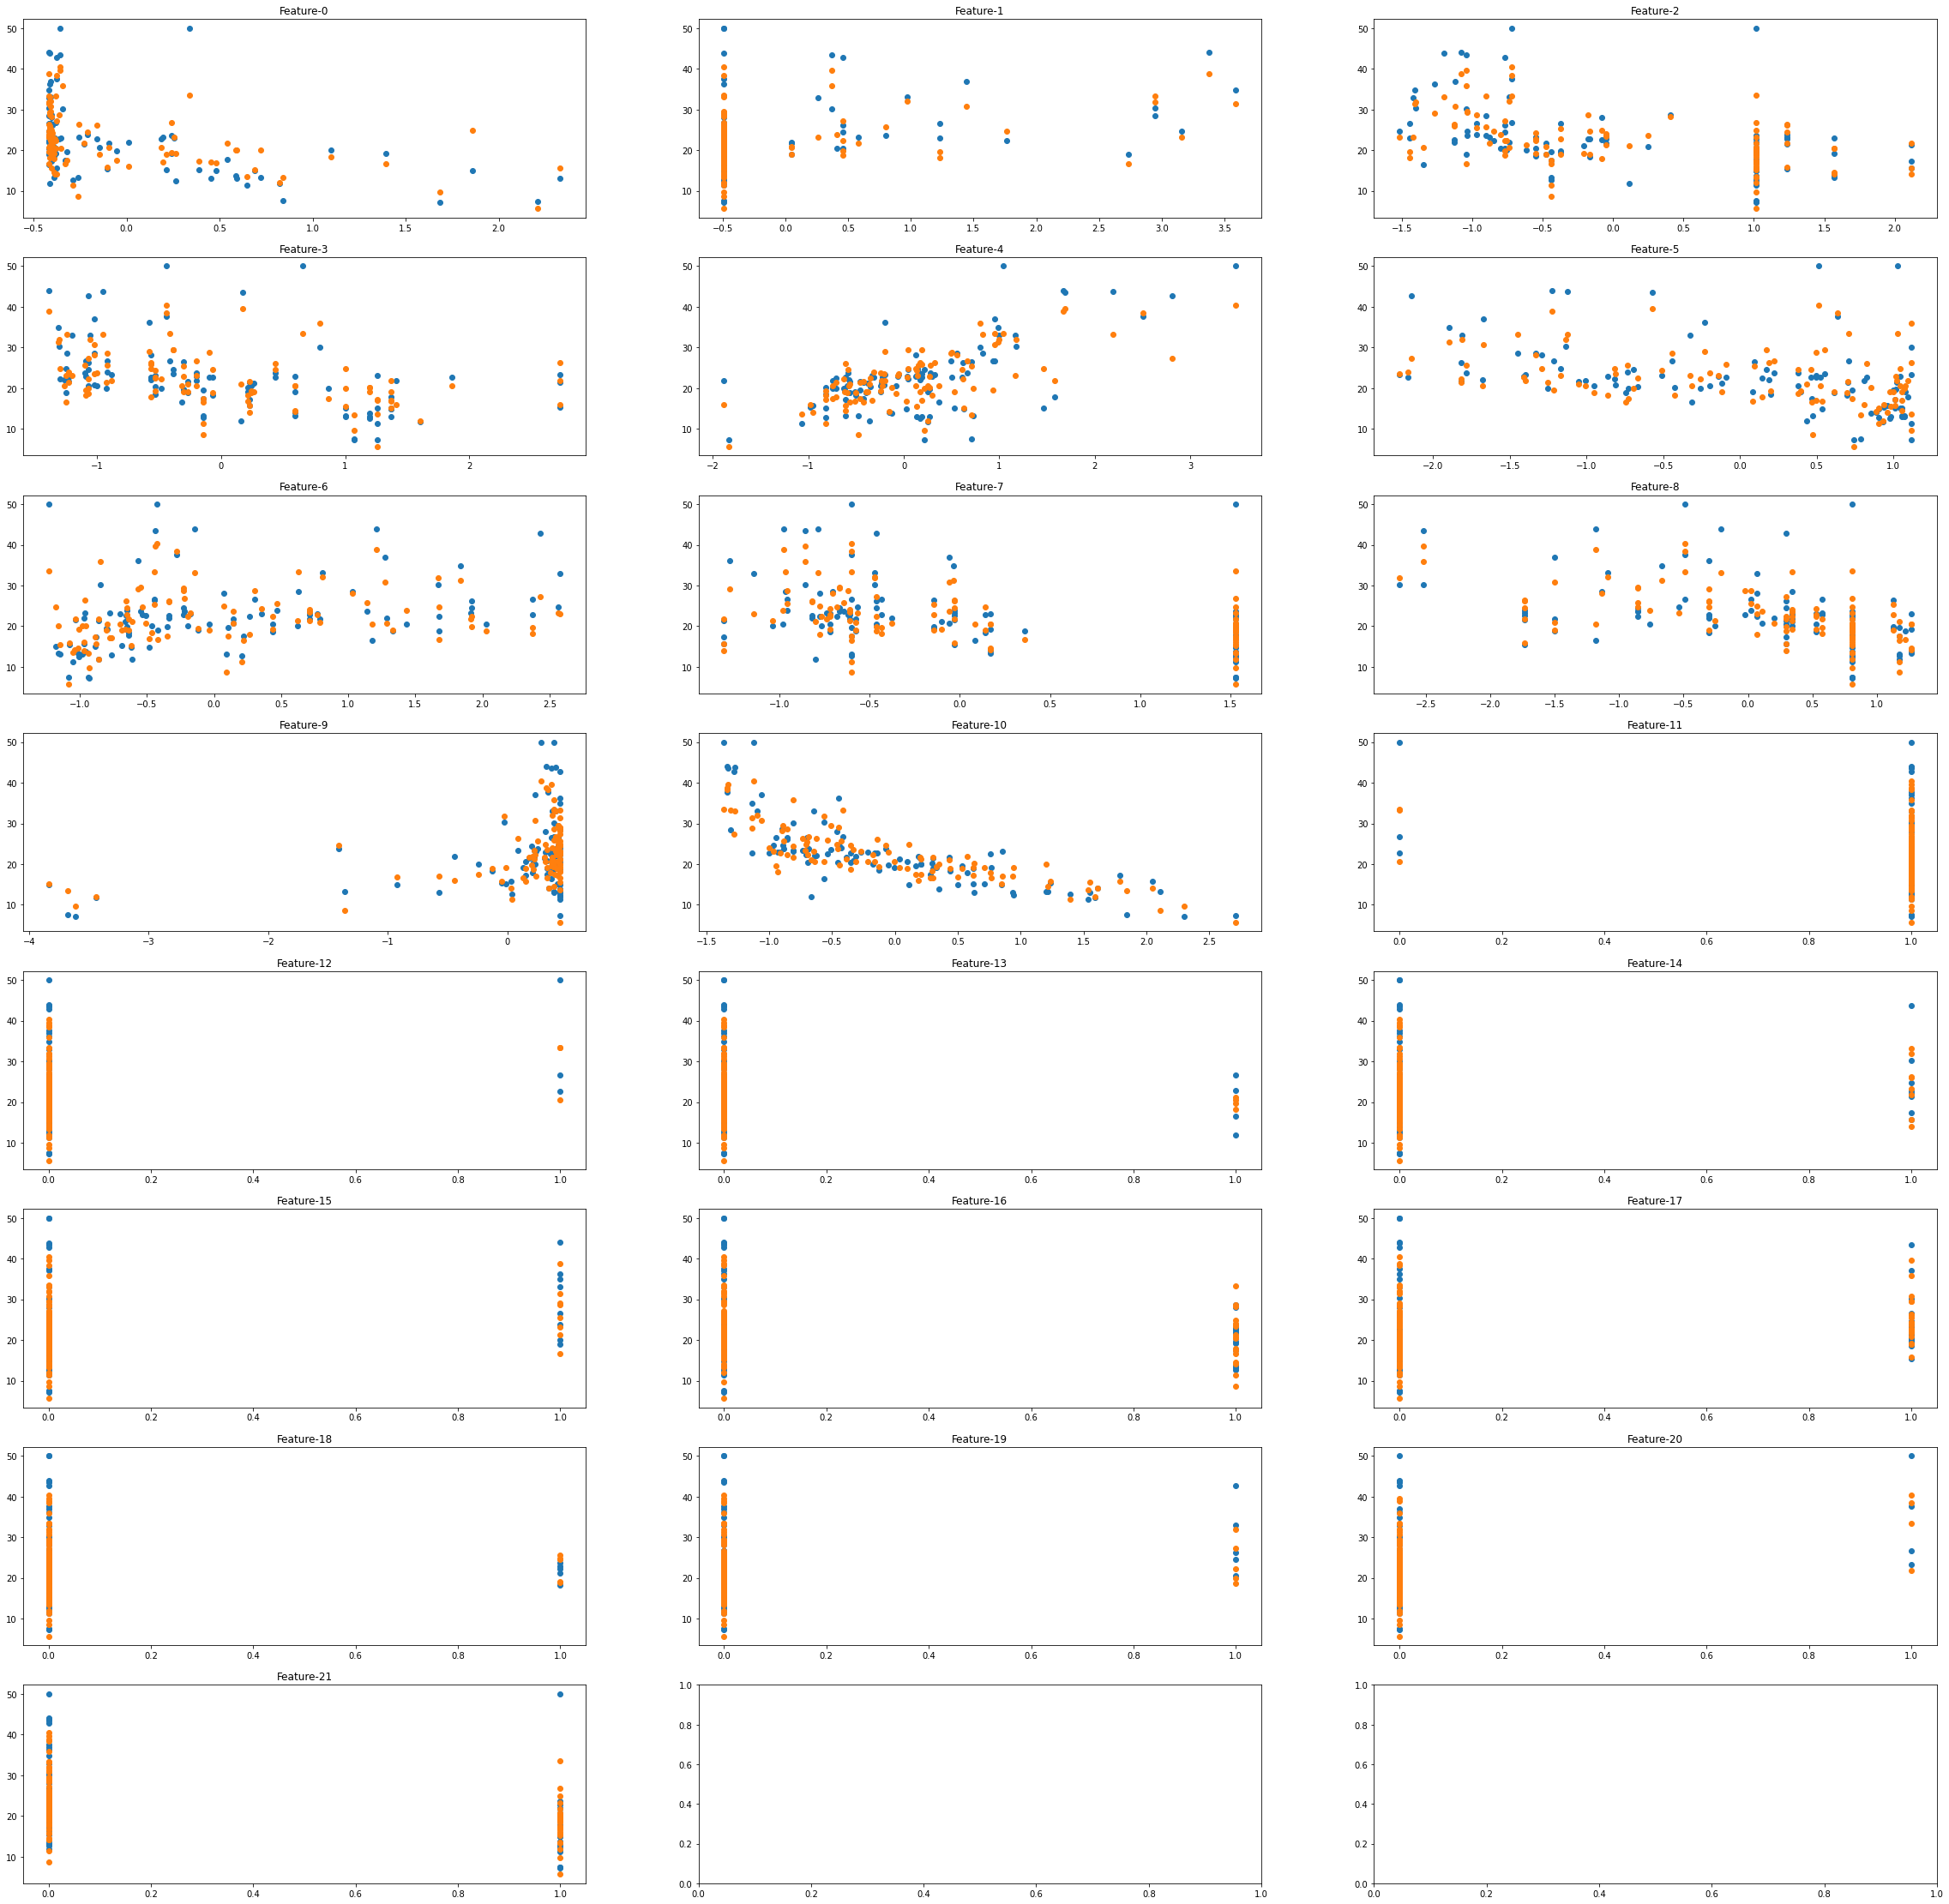

In [76]:
show_predication_result(X_test, y_test)

## Outliers

### Part-02 Logstic Regression

1. Data 
+ Pre-processing 
+ Feature-Extractor
+ Split Training, Test, Validation
+ Build Model
+ Gradient Descent 
+ Evaluation
+ Predicat
+ Analysis

#### Pre-processing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
from struct import unpack
import os

In [33]:
data = os.path.expanduser('~/data')

In [6]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4) # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]

    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype = np.uint8) #Initialize numpy array
    y = np.zeros(N, dtype = np.uint8) # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1) # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [31]:
X_train, y_train = loadmnist(data+'/course_data/t10k-images-idx3-ubyte',data+'/course_data/t10k-labels-idx1-ubyte')

In [32]:
X_test, y_test = loadmnist(data+'/course_data/train-images-idx3-ubyte',data+'/course_data/train-labels-idx1-ubyte')

In [34]:
X_train.shape

(10000, 784)

In [35]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [96]:
y_test

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

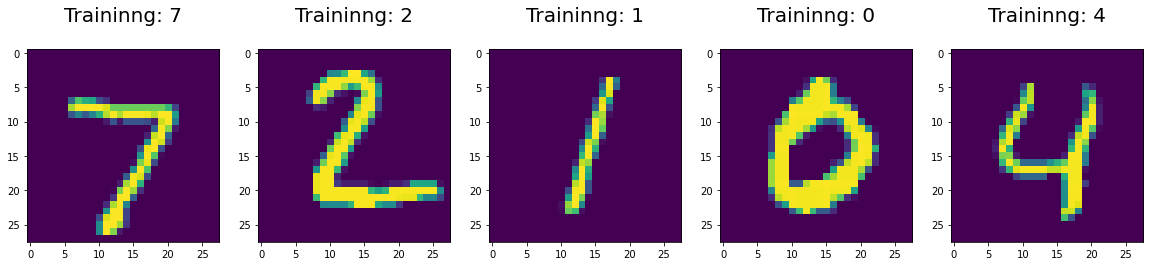

In [97]:
plt.figure(figsize = (20, 4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28, 28)))
    plt.title('Traininng: %i\n' % label, fontsize = 20)

In [98]:
### We only choose label with 0 and 6

In [100]:
zero_train_indices = np.where(y_train == 0)
one_train_indices = np.where(y_train == 6)
train_indices = np.concatenate((zero_train_indices[0], one_train_indices[0]))

zero_test_indices = np.where(y_test == 0)
one_test_indices = np.where(y_test == 6)
test_indices = np.concatenate((zero_test_indices[0], one_test_indices[0]))

In [102]:
train_indices = np.random.choice(train_indices, size = len(train_indices), replace=False)
test_indices = np.random.choice(test_indices, size = len(test_indices), replace=False)

In [104]:
val_ratio= 0.2

train_indices = train_indices[: int(len(train_indices) * (1 - val_ratio))]
val_indices = train_indices[int(len(train_indices) * (1 - val_ratio)):]

In [105]:
binary_x_train = X_train[train_indices]
binary_x_test = X_test[test_indices]
binary_x_val = X_train[val_indices]

binary_y_train = y_train[train_indices]
binary_y_test = y_test[test_indices]
binary_y_val = y_train[val_indices]

In [106]:
import random

In [107]:
binary_y_train

array([6, 0, 0, ..., 6, 0, 0], dtype=uint8)

Text(0.5, 1.0, 'Training: 0\n')

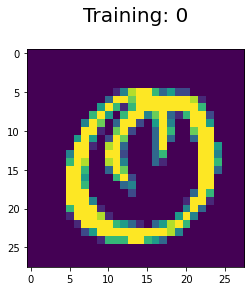

In [111]:
plt.imshow(np.reshape(binary_x_train[1], (28,28)))
plt.title('Training: %i\n' % binary_y_train[1], fontsize =20)

In [112]:
from collections import Counter

In [113]:
Counter(binary_y_train)

Counter({6: 768, 0: 782})

In [114]:
Counter(binary_y_test)

Counter({6: 5918, 0: 5923})

In [115]:
Counter(binary_y_val)

Counter({0: 148, 6: 162})

In [117]:
### Build model

In [118]:
from sklearn.linear_model import LogisticRegression

In [120]:
clf = LogisticRegression(random_state = 0, solver = 'lbfgs')
# L-BFGS-B - Software for Large-scale Bound-constrained Optimization

In [123]:
import warnings
warnings.filterwarnings('ignore')
clf.fit(binary_x_train, binary_y_train)

LogisticRegression(random_state=0)

In [122]:
clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.53088187e-07,  7.89899455e-07,
         5.42410232e-05,  2.74522215e-06,  2.44634410e-06,
         2.70054487e-06,  2.15185168e-06,  2.11089799e-06,
         5.22525865e-06,  1.94199224e-06,  6.52722113e-07,
         2.07541453e-07,  0.00000000e+00,  0.00000000e+0

In [124]:
clf.intercept_

array([0.00016519])

In [125]:
clf.score

<bound method ClassifierMixin.score of LogisticRegression(random_state=0)>

In [126]:
clf.score(binary_x_train, binary_y_train)

1.0

In [127]:
clf.score(binary_x_val, binary_y_val)

1.0

In [128]:
binary_x_test.shape

(11841, 784)

In [129]:
binary_y_test.shape

(11841,)

In [130]:
clf.score(binary_x_test, binary_y_test)

0.9865720800608057

In [131]:
predicated_result = clf.predict(binary_x_test)

In [132]:
np.where(binary_y_test != predicated_result)

(array([   17,    45,    66,   137,   260,   279,   323,   453,   529,
          739,   753,   947,  1034,  1248,  1290,  1422,  1434,  1444,
         1539,  1689,  1784,  1817,  1881,  1932,  2008,  2109,  2173,
         2300,  2317,  2340,  2404,  2476,  2611,  2654,  2675,  2693,
         2801,  2854,  2945,  3017,  3074,  3180,  3224,  3311,  3312,
         3397,  3606,  3685,  3706,  3783,  3849,  3894,  4035,  4072,
         4155,  4200,  4260,  4415,  4467,  4484,  4564,  4707,  4720,
         4850,  4941,  5037,  5119,  5144,  5157,  5226,  5243,  5313,
         5403,  5429,  5599,  5651,  5677,  5720,  5857,  5873,  5891,
         5908,  5933,  5980,  6034,  6083,  6188,  6295,  6315,  6400,
         6577,  6607,  6651,  6867,  6901,  6918,  7005,  7029,  7040,
         7083,  7170,  7344,  7449,  7470,  7505,  7509,  7749,  7906,
         7947,  8239,  8307,  8311,  8405,  8748,  8776,  8855,  8928,
         8981,  9148,  9200,  9272,  9420,  9432,  9465,  9469,  9501,
      

Text(0.5, 1.0, 'Actual Value: 6 ; Predict Value: 6 \n')

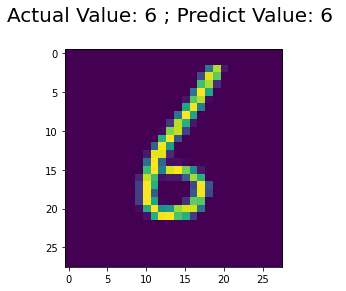

In [134]:
lookup_index = 1184

plt.imshow(np.reshape(binary_x_test[lookup_index], (28, 28)))
plt.title('Actual Value: {} ; Predict Value: {} \n'.format(binary_y_test[lookup_index], predicated_result[lookup_index]), fontsize = 20)

In [135]:
from sklearn import metrics

In [138]:
binary_y_test[0]

6

In [139]:
predicated_result[0]

6

In [140]:
metrics.precision_score(binary_y_test, predicated_result, average = 'macro')

0.9865879016517065

In [141]:
metrics.precision_score(binary_y_test, predicated_result, pos_label = 6)

0.9837056946077608

In [142]:
metrics.recall_score(binary_y_test, predicated_result, pos_label = 6)

0.9895234876647516

In [143]:
fpr, tpr, threshold = metrics.roc_curve(binary_y_test, predicated_result, pos_label = 6)

In [144]:
metrics.auc(fpr, tpr)

0.9865733258009728

In [146]:
cm = metrics.confusion_matrix(binary_y_test, predicated_result)

In [147]:
import seaborn as sns

In [ ]:
??sns.heatmap

In [149]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(binary_y_test, predicated_result)

In [150]:
data

array([[5826,   97],
       [  62, 5856]])

<AxesSubplot:>

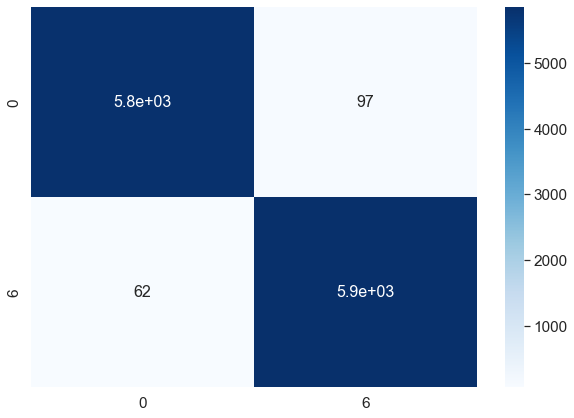

In [151]:
df_cm = pd.DataFrame(data, columns = np.unique(binary_y_test), index = np.unique(binary_y_test))

plt.figure(figsize = (10, 7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, cmap='Blues', annot=True, annot_kws = {'size': 16}) # font size

In [152]:
df_cm.index.name = 'Actual'

In [153]:
df_cm.columns.name = 'Predicted'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

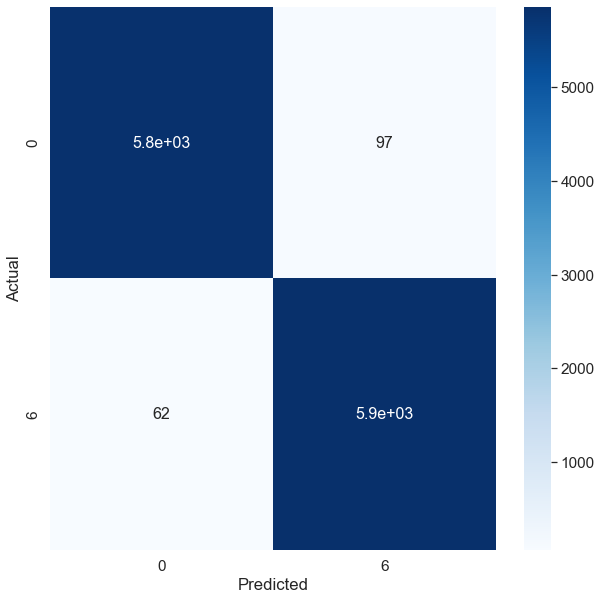

In [155]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_cm, cmap='Blues', annot=True, annot_kws={'size': 16})

In [156]:
## Boston code reproduction and reference answers

In [173]:
# 导入包
# 用于加载波士顿房价数据集
from sklearn.datasets import load_boston 
# pandas工具包 对于pandas陌生的同学可以参考官方10分钟上手教程：https://pandas.pydata.org/pandas-docs/stable/10min.html
import pandas as pd 
# seaborn 用于画图
import seaborn as sns
import numpy as np # numpy
# 显示画图
%matplotlib inline

In [174]:
data = load_boston()

In [175]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [176]:
df = pd.DataFrame(data['data'])
df.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [177]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 表 ：波士顿房价数据集缩写特征的中文描述
```
名称	中文描述
CRIM	住房所在城镇的人均犯罪率
ZN	住房用地超过 25000 平方尺的比例
INDUS	住房所在城镇非零售商用土地的比例
CHAS	有关查理斯河的虚拟变量（如果住房位于河边则为1,否则为0 ）
NOX	一氧化氮浓度
RM	每处住房的平均房间数
AGE	建于 1940 年之前的业主自住房比例
DIS	住房距离波士顿五大中心区域的加权距离
RAD	离住房最近的公路入口编号
TAX 每 10000 美元的全额财产税金额
PTRATIO	
住房所在城镇的师生比例
B	1000(Bk-0.63)^2,其中 Bk 指代城镇中黑人的比例
LSTAT	弱势群体人口所占比例
MEDV	业主自住房的中位数房价（以千美元计）
```

In [178]:
df.columns = data['feature_names']
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [179]:
df['price'] = data['target']
df.head(2)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  price  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6

<AxesSubplot:>

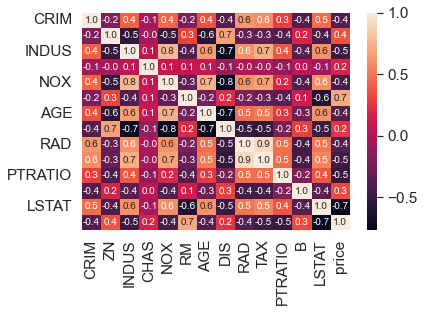

In [180]:
sns.heatmap(df.corr(), annot=True, fmt='.1f')

In [181]:
import matplotlib.pyplot as plt

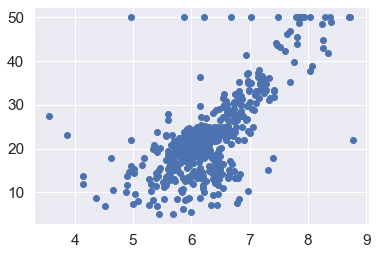

In [182]:
plt.scatter(df['RM'], df['price'])

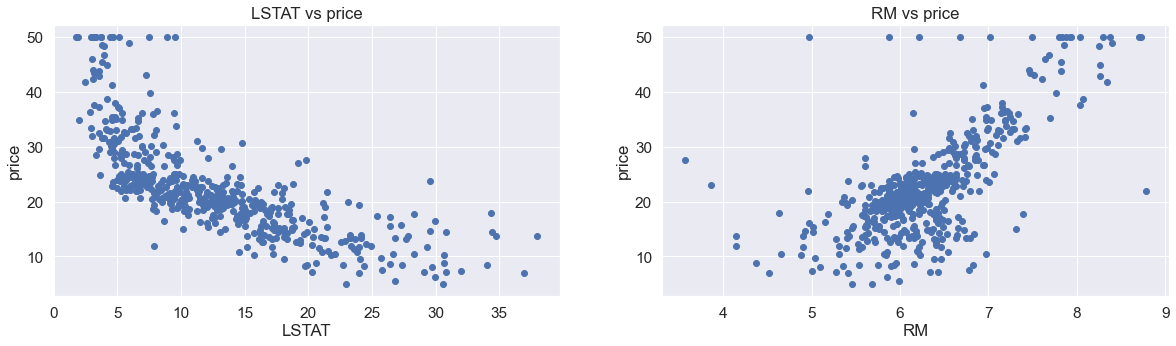

In [183]:
plt.figure(figsize = (20, 5))

features = ['LSTAT', 'RM']
target = df['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title('{} vs price'.format(col))
    plt.xlabel(col)
    plt.ylabel('price')

In [184]:
x = df['RM']
y = df['price']

In [185]:
history_notes = {_x: _y for _x, _y in zip(x, y)}
history_notes[6.575]

24.0

In [197]:
# 寻找与RM：6.57最相近的前三个价格，
similary_ys = [y for _, y in sorted(history_notes.items(), key=lambda x_y: (x_y[0] - 6.57) ** 2)[:3]]
similary_ys

[23.8, 24.0, 24.8]

In [198]:
np.mean(similary_ys) # 计算三个的平均值

24.2

## 用历史数据来预测未曾见到的过的数据，最直接的方法
## K-Neighbor-Nearst

In [199]:
def knn(query_x, history, top_n=3):
    sorted_notes = sorted(history.items(), key=lambda x_y: (x_y[0] - query_x) ** 2) 
    similar_notes = sorted_notes[:top_n]
    similar_ys = [y for _, y in similar_notes]
    
    return np.mean(similar_ys)

In [200]:
knn(5.4, history_notes)

15.700000000000001

## 为了更快的获得结果，我们希望通过拟合函数来获得预测能力

$$ f(rm) = k * rm + b $$ 

## Random Approach

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} (\hat{y_i} - y_i) ^ 2 $$
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

In [201]:
def loss(yhat, y):
    return np.mean((yhat - y) **2)

In [202]:
import random

In [203]:
min_loss = float('inf')
best_k, bes_b = None, None

print(min_loss)

inf


In [212]:
min_loss = float('inf')
best_k, bes_b = None, None

for step in range(1000):
    min_v, max_v = -100, 100
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [k * rm_i + b for rm_i in x]
    current_loss = loss(y_hats, y)
    
    if current_loss <min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('In step {}, we have obtained the function f(rm) = {} * rm + {}, at this time loss is: {}'.format(step, k, b, current_loss))

In step 0, we have obtained the function f(rm) = 14 * rm + -78, at this time loss is: 212.87040239525695
In step 70, we have obtained the function f(rm) = 10 * rm + -47, at this time loss is: 88.70654683794466
In step 256, we have obtained the function f(rm) = 13 * rm + -55, at this time loss is: 68.45390542094862
In step 526, we have obtained the function f(rm) = 10 * rm + -37, at this time loss is: 54.977297826086954


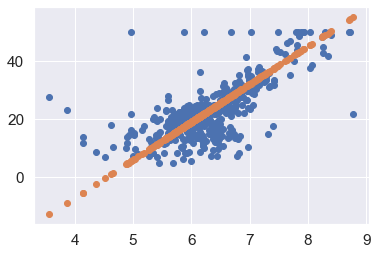

In [196]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## 蒙特卡洛模拟

## Supervisor

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

$$ \frac{\partial{loss(k, b)}}{\partial{k}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) * rm_i $$

$$ \frac{\partial{loss(k, b)}}{\partial{b}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i)$$

In [206]:
def partial_k(k, b, x, y):
    return 2 * np.mean((k*x+b-y) *x)

In [207]:
def partial_b(k, b, x, y):
    return 2*np.mean(k*x+b-y)

In [208]:
k, b = random.random(), random.random()
min_loss = float('inf')
best_k, best_b = None, None
learning_rate = 1e-2

In [211]:
for step in range(2000):
    k,b = k+(-1*partial_k(k,b,x,y) * learning_rate), b+(-1*partial_b(k,b,x,y) * learning_rate)
    y_hats = k * x +b
    current_loss = loss(y_hats, y)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('On the {} step, we have func f(rm) = {} * rm + {}, loss is {} now'.format(step, k, b, current_loss))

On the 0 step, we have func f(rm) = 6.968714597804018 * rm + -21.099847342593957, loss is 45.86961514375004 now
On the 1 step, we have func f(rm) = 6.9692276199804555 * rm + -21.103110737199852, loss is 45.86852398135223 now
On the 2 step, we have func f(rm) = 6.969740518789288 * rm + -21.10637334704986, loss is 45.8674333436799 now
On the 3 step, we have func f(rm) = 6.970253294260183 * rm + -21.109635172332695, loss is 45.86634323048074 now
On the 4 step, we have func f(rm) = 6.9707659464228 * rm + -21.11289621323702, loss is 45.86525364150249 now
On the 5 step, we have func f(rm) = 6.97127847530679 * rm + -21.116156469951456, loss is 45.8641645764931 now
On the 6 step, we have func f(rm) = 6.971790880941801 * rm + -21.11941594266458, loss is 45.8630760352006 now
On the 7 step, we have func f(rm) = 6.972303163357468 * rm + -21.122674631564923, loss is 45.86198801737313 now
On the 8 step, we have func f(rm) = 6.972815322583423 * rm + -21.12593253684097, loss is 45.86090052275896 now
O

In [213]:
best_k, best_b

(10, -37)

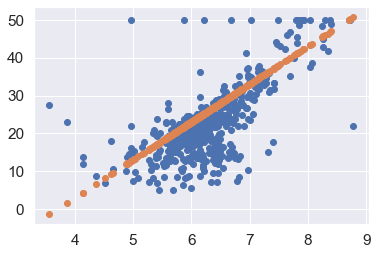

In [214]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## Supervised Learning

## 我们把房价的预测 变成更加负责，精细的模型，该怎么做？

$$ f(x) = k * x + b $$

$$ f(x) = k2 * \sigma(k_1 * x + b_1) + b2 $$

$$ \sigma(x) = \frac{1}{1 + e^(-x)} $$ 

In [215]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

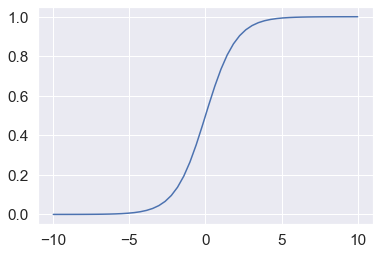

In [216]:
sub_x = np.linspace(-10, 10)
plt.plot(sub_x, sigmoid(sub_x))

In [217]:
def random_linear(x):
    k, b = random.random(), random.random()
    return k * x + b


In [218]:
def complex_function(x):
    return (random_linear(x))

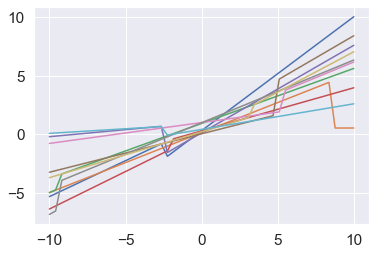

In [219]:
for _ in range(10):
    index = random.randrange(0, len(sub_x))
    sub_x_1, sub_x_2 = sub_x[:index], sub_x[index:]
    new_y = np.concatenate((complex_function(sub_x_1), complex_function(sub_x_2)))
    plt.plot(sub_x, new_y)

## 我们可以通过简单的、基本的模块，经过反复的叠加，来实现更加复杂的函数

## 面向越来越越复杂的函数？计算机如何求导？

## 1. 什么是机器学习？
## 2. KNN这种方法的缺陷，提出线性拟合的背景是什么
## 3. 怎么样通过监督的方法，来获得更快的函数权值更新
## 4. 非线性函数和线性函数的结合，可以拟合出非常复杂的函数
## 5. 深度学习我们可以通过基本的函数模块，来拟合更加复杂的函数


## Assigment:

$$ L2-Loss(y, \hat{y}) = \frac{1}{n}\sum{(\hat{y} - y)}^2 $$
$$ L1-Loss(y, \hat{y}) = \frac{1}{n}\sum{|(\hat{y} - y)|} $$


## 将代码中的L2-Loss 变成L1Loss 并且实现梯度下降

## 从0开始实现L1Loss梯度下降

## 1 导入包

In [221]:
import numpy as np
import pandas as pd

## 2 加载数据集

In [222]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [223]:
X = boston.data
y = boston.target

In [224]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [225]:
df.describe() # 数据描述，可以查看每个每个变量的统计量

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

## 3 数据预处理

归一化或者标准化首先在维数非常多的时候，可以防止某一维或某几维对数据影响过大，其次可以程序可以运行更快。方法很多，标准化，min-max,z-score,p范数等，具体怎么使用，要根据数据集的特征来选择。

[延伸阅读-数据标准化的迷思之深度学习领域](https://zhuanlan.zhihu.com/p/81560511)

In [228]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # z = (x - u) / s u为均值，s为标准差
X = ss.fit_transform(df) # 对于线性模型，一般需要做归一化或者标准化处理，否则会出现梯度爆炸，对于树模型一般不需要
df = pd.DataFrame(X, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
df.describe()

CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean   2.808469e-17  6.599903e-16 -4.633974e-16 -4.353127e-16  1.404235e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00 -2.725986e-01 -1.465882e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01 -2.725986e-01 -9.130288e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01 -2.725986e-01 -1.442174e-01   
75%    7.396560e-03  4.877224e-02  1.015999e+00 -2.725986e-01  5.986790e-01   
max    9.933931e+00  3.804234e+00  2.422565e+00  3.668398e+00  2.732346e+00   

                 RM           AGE           DIS           RAD           TAX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.755293e-17  2.176564e-16 -1.685082e-16 -5.055245e-16  8.987102e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -3.880249e+00 -2.335437e+00 -1.267069e+00 -9.828429e-01 -1.313990e+00   
25%   -5.686303e-01 -8.374480e-01 -8.056878e-01 -6.379618e-01 -7.675760e-01   
50%   -1.084655e-01  3.173816e-01 -2.793234e-01 -5.230014e-01 -4.646726e-01   
75%    4.827678e-01  9.067981e-01  6.623709e-01  1.661245e+00  1.530926e+00   
max    3.555044e+00  1.117494e+00  3.960518e+00  1.661245e+00  1.798194e+00   

            PTRATIO             B         LSTAT  
count  5.060000e+02  5.060000e+02  5.060000e+02  
mean  -1.067218e-15  4.493551e-16 -2.246775e-16  
std    1.000990e+00  1.000990e+00  1.000990e+00  
min   -2.707379e+00 -3.907193e+00 -1.531127e+00  
25%   -4.880391e-01  2.050715e-01 -7.994200e-01  
50%    2.748590e-01  3.811865e-01 -1.812536e-01  
75%    8.065758e-01  4.336510e-01  6.030188e-01  
max    1.638828e+00  4.410519e-01  3.548771e+00

In [229]:
# y=Σwixi+b
# 因为b的求导都为1，给数据添加一个偏置b并且设置为1，当做数据的某一个特征并且进行梯度更新 wi*b=wi
df['bias'] = 1
df

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  bias  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562     1  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439     1  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727     1  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517     1  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501     1  
..        ...       ...       ...       ...       ...       ...   ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147     1  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850     1  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048     1  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302     1  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058     1  

[506 rows x 14 columns]

划分数据集，其中20%的数据用作测试集X_test,y_test,另外80%的数据用做训练集X_train,y_train，其中random_state为随机种子

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)

In [231]:
print('X_train.shape, y_train.shape:', X_train.shape, y_train.shape)
print('X_test.shape, y_test.shape', X_test.shape, y_test.shape)

X_train.shape, y_train.shape: (404, 14) (404,)
X_test.shape, y_test.shape (102, 14) (102,)


In [232]:
X_train = np.array(X_train)

## 模型训练与梯度更新

In [233]:
def l1_cost(X, y, theta):
    """
    X: 特征
    y: 目标值
    theta: 模型参数
    """
    k = X.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost =+ 1/k * np.abs(y[i] - theta.dot(X[i, :]))
    return total_cost

In [234]:
def l2_cost(X, y, theta):
    k = X.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost += 1/k * (y[i] - theta.dot(X[i, :])) ** 2
    return total_cost

In [235]:
np.zeros(10).shape

(10,)

In [236]:
def step_l1_gradient(X, y, learning_rate, theta):
    """
    计算MAE损失函数的梯度的函数
    对于0处的不可微分点返回梯度值0
    X:特征向量
    y：目标值
    learing_rate:学习率
    theta:参数
    """

    n = X.shape[0]
    print(n)
    e = y - X @ theta
    gradients = -(X.T @ np.sign(e)) / n
    theta = theta - learning_rate * gradients
    return theta

In [237]:
def step_l2_gradient(X, y, learning_rate, theta):
    k = X.shape[0]
    x = X.shape[1]
    gradients = np.zeros(n)
    for i in range(k):
        for j in range(n):
            gradients[j] += (-2/k) * (y[i] - (theta.dot(X[i, :]))) * X[i, j]
    theta = theta - learning_rate * gradients
    return theta

In [238]:
def step_gradient(X, y, learning_rate, theta):
    """
    X:特征向量
    y：目标值
    learing_rate:学习率
    theta:参数
    """
    m_deriv = 0
    N = len(X)
    for i in range(N):
        # 计算偏导
        # -x(y - (mx + b)) / |mx + b|
        m_deriv += - X[i] * (y[i] - (theta*X[i] + b)) / abs(y[i] - (theta*X[i] + b))
    # We subtract because the derivatives point in direction of steepest ascent
    theta -= (m_deriv / float(N)) * learning_rate
#     theta = theta - learning_rate * gradients
    return theta

In [239]:
def gradient_descent(X_train, y_train, learning_rate, iterations):
    k = X_train.shape[0]
    n = X_train.shape[1]
    theta = np.zeros(n)
    loss_values = []
    print(theta.shape)
    for i in range(iterations):
        theta = step_l1_gradient(X_train, y_train, learning_rate, theta)
        loss = l1_cost(X_train, y_train, theta)
        loss_values.append(loss)
        print(i, 'cost:', loss)
    return theta, loss_values

In [240]:
# 训练参数
learning_rate = 0.04 # 学习率
iterations = 300 # 迭代次数
theta ,loss_values= gradient_descent(X_train, y_train, learning_rate, iterations)

(14,)
404
0 cost: 0.04594399172713912
404
1 cost: 0.045848379493882215
404
2 cost: 0.0457527672606253
404
3 cost: 0.04565715502736838
404
4 cost: 0.04556154279411147
404
5 cost: 0.04546593056085456
404
6 cost: 0.045370318327597636
404
7 cost: 0.04527470609434072
404
8 cost: 0.04517909386108381
404
9 cost: 0.04508348162782689
404
10 cost: 0.04498786939456998
404
11 cost: 0.04489225716131306
404
12 cost: 0.04479664492805615
404
13 cost: 0.044701032694799234
404
14 cost: 0.044605420461542325
404
15 cost: 0.0445098082282854
404
16 cost: 0.04441419599502849
404
17 cost: 0.04431858376177157
404
18 cost: 0.044222971528514655
404
19 cost: 0.04412735929525775
404
20 cost: 0.044031747062000824
404
21 cost: 0.04393613482874391
404
22 cost: 0.043840522595487
404
23 cost: 0.04374491036223008
404
24 cost: 0.04364929812897317
404
25 cost: 0.04355368589571625
404
26 cost: 0.04345807366245934
404
27 cost: 0.04336246142920242
404
28 cost: 0.0432668491959455
404
29 cost: 0.04317123696268859
404
30 cost: 

# Heart Practise

In [44]:
import pandas as pd
path = '~/data/'
dataPath = path + 'heart.csv'
train_data = pd.read_csv(dataPath)
train_data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

# 字段含义 

```
字段名	    含义	
age	      年龄	
sex	      性别(1 = 男性, 0 = 女性)
cp	      胸部疼痛类型(值1：典型心绞痛，值2：非典型性心绞痛，值3：非心绞痛，值4：无症状）
trestbps   血压	
chol	   胆固醇	
fbs	      空腹血糖（> 120 mg/dl，1=真；0=假）	
restecg	   心电图结果（0=正常，1=患有ST-T波异常，2=根据Estes的标准显示可能或确定的左心室肥大）	
thalach	   最大心跳数	
exang	   运动时是否心绞痛（1=有过；0=没有）
oldpeak	   运动相对于休息的ST
slop	   心电图ST segment的倾斜度(值1:上坡，值2:平坦，值3:下坡） 	
ca	      透视检查看到的血管数	
thal	   缺陷种类（3=正常；6=固定缺陷；7=可逆缺陷）
target	   是否患病（0=否，1=是）
```

# 打印数据集的简要摘要  

In [261]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [262]:
train_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

## 将“sex”列变为两列“sex_0”和“sex_1”。

In [263]:
sex = pd.get_dummies(train_data['sex'], prefix = "sex") 

##  将“sex_0”和“sex_1”添加到数据集中。

In [264]:
train_data = pd.concat([train_data,sex], axis = 1)            

##  并将sex列删除。

In [265]:
train_data = train_data.drop(columns = ['sex'])

##  打印出前五行。查看sex_0，sex_1是否添加成功，sex是否删除成功。                                               

In [266]:
train_data.head()

age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0   63   3       145   233    1        0      150      0      2.3      0   0   
1   37   2       130   250    0        1      187      0      3.5      0   0   
2   41   1       130   204    0        0      172      0      1.4      2   0   
3   56   1       120   236    0        1      178      0      0.8      2   0   
4   57   0       120   354    0        1      163      1      0.6      2   0   

   thal  target  sex_0  sex_1  
0     1       1      0      1  
1     2       1      0      1  
2     2       1      1      0  
3     2       1      0      1  
4     2       1      1      0

## 得到样本标签

In [268]:
y_data = train_data.target.values
train_data.shape

(303, 15)

## 得到样本特征集

In [270]:
x_data = train_data.drop(['target'],axis=1)
x_data.shape

(303, 14)

## 划分数据集  参数：test_size=0.3, random_state=33

In [272]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3, random_state=33)

## 归一化处理

### 导入StandardScaler包，并初始化

In [274]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

## fit函数/模块用来训练模型参数 

In [276]:
standardScaler.fit(X_train)

StandardScaler()

## 对训练集和测试集进行标准化

In [278]:
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test) 

## 定义逻辑回归模型 

In [280]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

## 计算训练集得分

In [282]:
log_reg.score(X_train,y_train)

0.8537735849056604

## 计算测试集得分

In [284]:
log_reg.score(X_test,y_test)

0.8461538461538461

### 使用classification_report函数显示主要分类指标的文本报告

In [286]:
from sklearn.metrics import classification_report
y_predict_log = log_reg.predict(X_test)
print(classification_report(y_test,y_predict_log))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        50
           1       0.78      0.93      0.84        41

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.85      0.85        91

